# 1.인구피라미드
### 1) 남자 데이터 정의 

In [1]:
import pandas as pd
import opnepyxl as xl 

# skiprows 처음 세줄 skip
# 필요한 데이터는 행정기관 별 인구 데이터,행정기관을 Index 칼럼처리 , usecols로 행정기관, 0~100이상의 남자 데이터 까지 데이터 가져오기(usecols)
df_m = pd.read_excel('202110_202110_연령별인구현황_월간.xlsx', skiprows=3, index_col= '행정기관',usecols='B,E:O')  
df_m.head(5)

/home/ozzom/Workspace/venv/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세,80~89세,90~99세,100세 이상
행정기관,,,,,,,,,,,
전국,"1,944,180","2,438,376","3,511,372","3,478,862","4,152,565","4,359,713","3,489,422","1,679,626","646,176","57,847","2,099"
서울특별시,"303,009","389,543","689,280","720,614","736,322","742,615","606,204","317,028","114,953","10,482",580
부산광역시,"113,771","137,336","217,496","208,912","253,605","270,760","258,529","134,136","44,446","3,243",134
대구광역시,"86,775","114,392","166,160","150,026","184,278","205,661","162,305","77,699","28,993","2,133",64
인천광역시,"112,362","139,509","204,435","207,990","246,041","254,827","196,006","81,965","28,577","2,706",118


### 2) 데이터 손보기- 숫자의 컴마 없애기 등등 (전국 데이터만에 한해서만 보정)

In [2]:
df_m.iloc[0] = df_m.iloc[0].str.replace(',','').astype(int)  # 1,195,915 -> 1195915 (정수형 변환), iloc[0]은 전국행의 모든 데이터 
df_m.iloc[0]

0~9세       1944180
10~19세     2438376
20~29세     3511372
30~39세     3478862
40~49세     4152565
50~59세     4359713
60~69세     3489422
70~79세     1679626
80~89세      646176
90~99세       57847
100세 이상       2099
Name: 전국  , dtype: object

### 3) 여자 데이터 정의

In [3]:
df_w = pd.read_excel('202110_202110_연령별인구현황_월간.xlsx', skiprows=3, index_col= '행정기관',usecols='B, R:AB')  
df_w.head(5)

/home/ozzom/Workspace/venv/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,0~9세.1,10~19세.1,20~29세.1,30~39세.1,40~49세.1,50~59세.1,60~69세.1,70~79세.1,80~89세.1,90~99세.1,100세 이상.1
행정기관,,,,,,,,,,,
전국,"1,848,368","2,283,350","3,180,531","3,261,071","4,017,262","4,262,742","3,634,837","2,031,294","1,171,013","203,394","8,190"
서울특별시,"287,052","370,639","741,597","722,279","749,778","764,829","677,012","379,318","176,698","30,948","1,648"
부산광역시,"107,958","129,298","201,568","198,568","249,110","285,142","289,201","162,757","77,840","11,954",547
대구광역시,"82,642","104,956","145,984","136,257","188,973","214,233","178,665","99,482","52,941","7,806",296
인천광역시,"106,686","131,864","187,932","193,726","234,325","255,230","199,792","96,986","53,397","10,142",393


In [4]:
df_m.columns

Index(['0~9세', '10~19세', '20~29세', '30~39세', '40~49세', '50~59세', '60~69세',
       '70~79세', '80~89세', '90~99세', '100세 이상'],
      dtype='object')

In [5]:
df_w.columns = df_m.columns

In [6]:
df_w

,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세,80~89세,90~99세,100세 이상
행정기관,,,,,,,,,,,
전국,"1,848,368","2,283,350","3,180,531","3,261,071","4,017,262","4,262,742","3,634,837","2,031,294","1,171,013","203,394","8,190"
서울특별시,"287,052","370,639","741,597","722,279","749,778","764,829","677,012","379,318","176,698","30,948","1,648"
부산광역시,"107,958","129,298","201,568","198,568","249,110","285,142","289,201","162,757","77,840","11,954",547
대구광역시,"82,642","104,956","145,984","136,257","188,973","214,233","178,665","99,482","52,941","7,806",296
인천광역시,"106,686","131,864","187,932","193,726","234,325","255,230","199,792","96,986","53,397","10,142",393
광주광역시,"55,852","73,780","99,350","88,743","118,905","118,385","89,520","52,440","27,065","4,717",214
대전광역시,"52,650","69,002","100,220","90,491","116,163","120,113","97,568","50,208","27,210","4,700",161
울산광역시,"45,177","52,318","60,359","68,252","89,902","101,883","76,805","32,646","15,764","2,660",77
세종특별자치시,"23,033","22,427","18,613","31,414","35,464","22,909","16,705","7,849","4,932","1,021",30


In [7]:
df_w.iloc[0] = df_w.iloc[0].str.replace(',','').astype(int)   # 1,848,368 -> 1848368 (정수형 변환), iloc[0]은 전국행의 모든 데이터 

In [8]:
df_w.iloc[0]

0~9세       1848368
10~19세     2283350
20~29세     3180531
30~39세     3261071
40~49세     4017262
50~59세     4262742
60~69세     3634837
70~79세     2031294
80~89세     1171013
90~99세      203394
100세 이상       8190
Name: 전국  , dtype: object

### 4) 데이터 시각화 - 막대 그래프 사용

In [9]:
import matplotlib.pyplot as plt 
import matplotlib

matplotlib.rcParams['font.family'] ='NanumGothic'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False

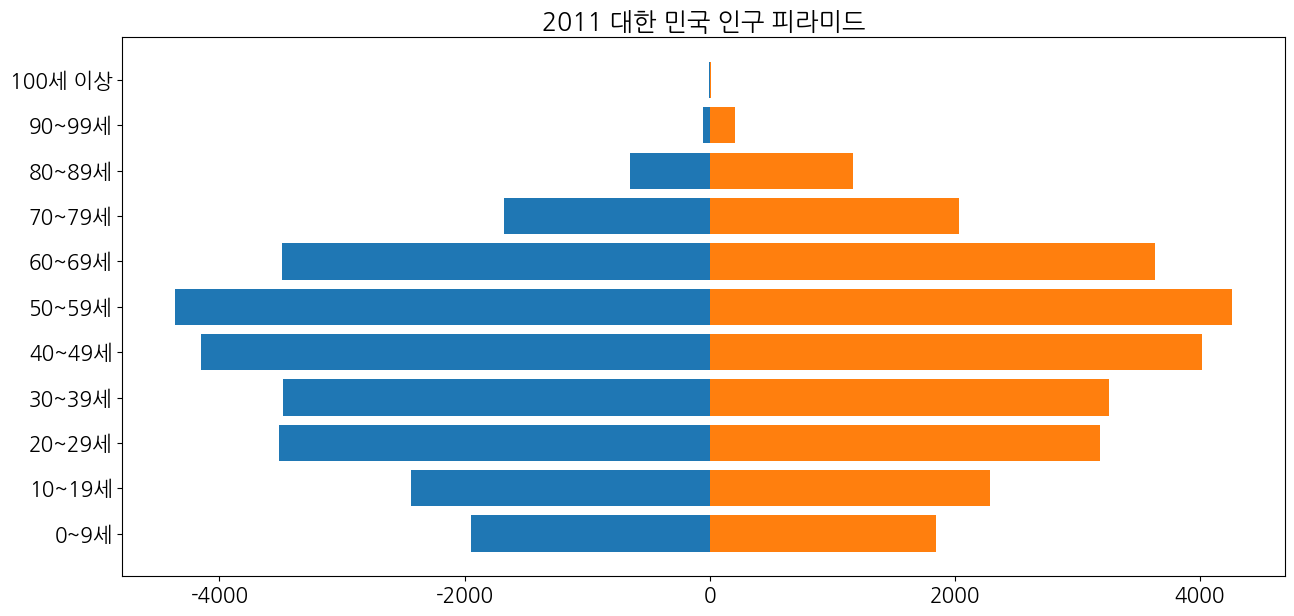

In [10]:
plt.figure(figsize=(15,7))
plt.barh(df_m.columns, -df_m.iloc[0] //1000)   # 전국 남자 데이터 - 남자 데이터를 마이너스로 하면 항아리 모양이 됨 
plt.barh(df_w.columns, df_w.iloc[0] //1000)   # 전국 여자 데이터 
plt.title ('2011 대한 민국 인구 피라미드')
plt.savefig('2011 대한 민국 인구 피라미드.png', dpi = 100)
plt.show()